# Exploratory Data Analysis

In this exercise, we will explore a dataset containing samples collected from various SD-WAN network devices. The dataset includes variables such as CPU utilization, memory consumption, and software version, which can be analyzed to identify common patterns and behaviors across the devices.


###Objectives.

- Load a dataset in .csv format.
- Explore the capabilities of the NumPy, Pandas, Matplotlib, and Seaborn libraries for data analysis and visualization


Before diving into the data exploration and analysis, we need to import the necessary libraries that provide the tools and functions we'll be using. These libraries are essential for tasks such as data manipulation, visualization, and statistical analysis. Here's a breakdown of the libraries we'll be importing and their roles in our analysis:"

- **NumPy**: NumPy is the fundamental package for scientific computing in Python. It provides support for large, multi-dimensional arrays and matrices, along with a collection of mathematical functions to operate on these arrays. We'll leverage NumPy for numerical computations and data transformation
- **Pandas**: This library is crucial for data manipulation and analysis. We'll use it to load our dataset, clean and preprocess it, and perform various operations on the data.
- **Matplotlib**: This library provides a wide range of tools for creating static, interactive, and animated visualizations in Python. We'll utilize Matplotlib to generate plots and charts that help us understand the patterns and relationships within the data.
- **Seaborn**: Built on top of Matplotlib, Seaborn provides a higher-level interface for creating visually appealing and informative statistical graphics. We'll use Seaborn to generate more advanced visualizations and explore the data's statistical properties.

In [27]:
pip install seaborn

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


In [28]:
pip install openpyxl

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


In [29]:
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns

Next, we'll check the versions of the libraries we're using. Libraries are frequently updated, and knowing their versions is helpful for referencing the correct documentation, ensuring the analysis can be reproduced in other environments, and facilitating troubleshooting.

In [30]:
print(f"Numpy Version: {np.__version__}")
print(f"Pandas Version: {pd.__version__}")
print(f"Matplotlib Version: {matplotlib.__version__}")
print(f"Seaborn Version: {sns.__version__}")

Numpy Version: 1.26.4
Pandas Version: 2.2.3
Matplotlib Version: 3.10.3
Seaborn Version: 0.13.2


Let's import and examine the dataset dictionary, provided by **domain experts** to understand the variables included in the analysis.


In [32]:
Dictionary = pd.read_excel('ai-ml-workshop/module_1/NEAI_EDA_Dictionary.xlsx')
Dictionary

,Column Name,Type,Description
0,timestamp,Numerical (Integer),UNIX timestamp indicating when the data sample...
1,cpu_utilization,Numerical (Integer),CPU usage percentage of the device at the time...
2,device_name,Categorical (String),Unique identifier or label for the device with...
3,vendor,Categorical (String),"Name of the device manufacturer (e.g., Cisco ..."
4,model,Categorical (String),"Model identifier of the device (e.g., MX450, M..."
5,os,Categorical (String),Operating system name or type running on the d...
6,version,Categorical (String),Version number of the operating system install...
7,hw_revision,Categorical (String),Hardware revision or build identifier of the d...
8,role,Categorical (String),Functional role of the device in the SD-WAN (e...
9,ip_address,Categorical (String),IP address assigned to the device.


Import the dataset from a CSV file and perform initial exploratory analysis to understand its underlying relationships and potential challenges. We can achieve this using Pandas for data loading and manipulation, and potentially Matplotlib and Seaborn for basic visualizations.

In [33]:
Path = 'ai-ml-workshop/module_1/Dataset Meraki.csv'
data = pd.read_csv(Path, sep=';', na_values=['?'], encoding = 'utf-8')

In [34]:
data.shape

(200, 11)

In [35]:
data.head()

,timestamp,cpu_utilization,device_name,vendor,model,os,version,hw_revision,role,ip_address,mem_utilization
0,1743516061,33,E-1-1,Meraki,MX450,meraki,18.10,hw-mx450-0001,vedge_hub,10.3.1.1,30.0
1,1743516061,32,E-1-2,Meraki,MX450,meraki,18.10,hw-mx450-0001,vedge_hub,10.3.1.2,32.0
2,1743516061,33,E-2-1,Meraki,MX67,meraki,16.16,hw-mx67-0001,vedge_branch,10.3.2.1,30.0
3,1743516061,30,E-2-2,Meraki,MX67,meraki,16.16,hw-mx67-0001,vedge_branch,10.3.2.2,31.0
4,1743516061,32,E-3-1,Meraki,MX67,meraki,16.16,hw-mx67-0001,vedge_branch,10.3.3.1,34.0


In [36]:
data.describe()

,timestamp,cpu_utilization,version,mem_utilization
count,2.000000e+02,200.0000,200.000000,200.000000
mean,1.743516e+09,55.8300,16.199200,32.440000
std,0.000000e+00,21.3563,0.272231,4.709277
min,1.743516e+09,10.0000,16.160000,30.000000
25%,1.743516e+09,33.0000,16.160000,31.000000
50%,1.743516e+09,52.0000,16.160000,32.000000
75%,1.743516e+09,80.0000,16.160000,33.000000
max,1.743516e+09,81.0000,18.100000,79.000000


In [37]:
print("Missing Values")
data.isnull().sum()

Missing Values


timestamp          0
cpu_utilization    0
device_name        0
vendor             0
model              0
os                 0
version            0
hw_revision        0
role               0
ip_address         0
mem_utilization    0
dtype: int64

In [38]:
print("Duplicated Rows")
data.duplicated().sum()

Duplicated Rows


0

In [39]:
# names of columns with only duplicated values (single unique value)
single_value_cols = []
for col in data.columns:
    num_duplicates = data[col].duplicated().sum()
    total_values = data.shape[0]
    if num_duplicates == total_values - 1 and total_values > 1:
        single_value_cols.append(col)

print(f"Columns with a single unique value: {single_value_cols}")

Columns with a single unique value: ['timestamp', 'vendor', 'os']


In [40]:
unique_cols = [col for col in data.columns if data[col].nunique() == data.shape[0]]
print(f"Columns with only different values: {unique_cols}")

Columns with only different values: ['device_name', 'ip_address']


In [41]:
data.iloc[50]

timestamp            1743516061
cpu_utilization              32
device_name              E-26-1
vendor                   Meraki
model                      MX67
os                       meraki
version                   16.16
hw_revision        hw-mx67-0001
role               vedge_branch
ip_address            10.3.26.1
mem_utilization            33.0
Name: 50, dtype: object

In [42]:
data.iloc[1:10]

,timestamp,cpu_utilization,device_name,vendor,model,os,version,hw_revision,role,ip_address,mem_utilization
1,1743516061,32,E-1-2,Meraki,MX450,meraki,18.10,hw-mx450-0001,vedge_hub,10.3.1.2,32.0
2,1743516061,33,E-2-1,Meraki,MX67,meraki,16.16,hw-mx67-0001,vedge_branch,10.3.2.1,30.0
3,1743516061,30,E-2-2,Meraki,MX67,meraki,16.16,hw-mx67-0001,vedge_branch,10.3.2.2,31.0
4,1743516061,32,E-3-1,Meraki,MX67,meraki,16.16,hw-mx67-0001,vedge_branch,10.3.3.1,34.0
5,1743516061,30,E-3-2,Meraki,MX67,meraki,16.16,hw-mx67-0001,vedge_branch,10.3.3.2,33.0
6,1743516061,30,E-4-1,Meraki,MX67,meraki,16.16,hw-mx67-0001,vedge_branch,10.3.4.1,31.0
7,1743516061,30,E-4-2,Meraki,MX67,meraki,16.16,hw-mx67-0001,vedge_branch,10.3.4.2,34.0
8,1743516061,32,E-5-1,Meraki,MX67,meraki,16.16,hw-mx67-0001,vedge_branch,10.3.5.1,33.0
9,1743516061,34,E-5-2,Meraki,MX67,meraki,16.16,hw-mx67-0001,vedge_branch,10.3.5.2,34.0


Dropped 'timestamp' column.


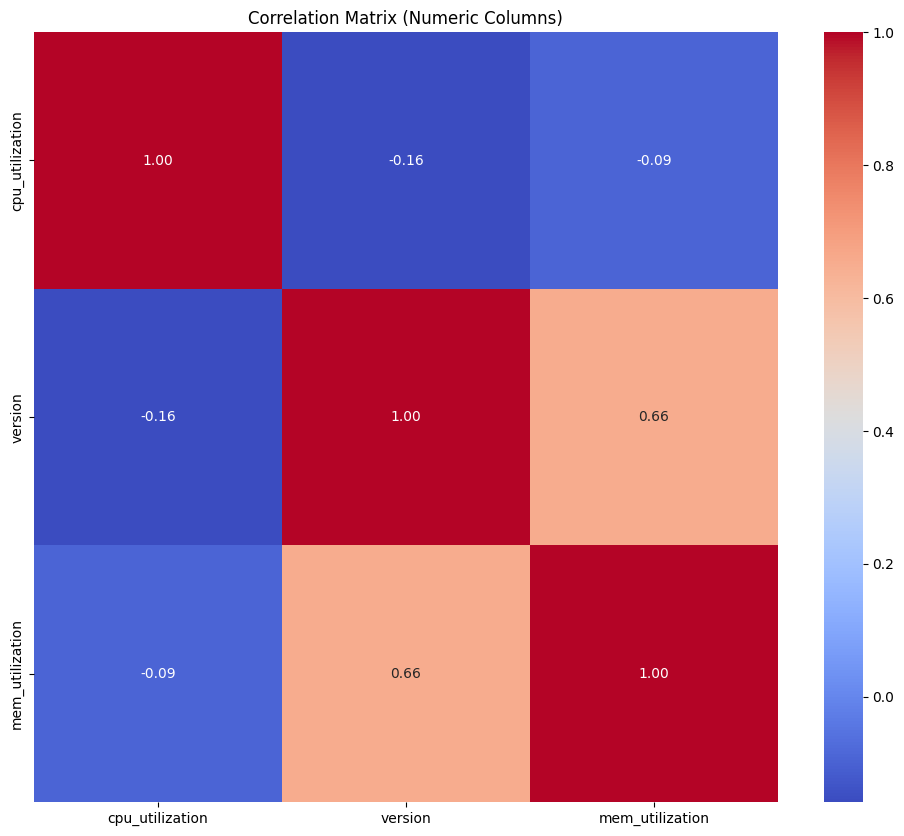

In [43]:
datac = data.copy()

# Drop the 'timestamp' column as it's not relevant for correlation calculation
if 'timestamp' in datac.columns:
    datac = datac.drop('timestamp', axis=1)
    print("Dropped 'timestamp' column.") # Optional: Add a print statement to confirm

# Select only numeric columns for correlation calculation
# This will automatically exclude any remaining non-numeric columns
numeric_datac = datac.select_dtypes(include=np.number)

# Check if there are any numeric columns left before calculating correlation
if not numeric_datac.empty:
    correlation_matrix = numeric_datac.corr()
    plt.figure(figsize=(12, 10))
    sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
    plt.title("Correlation Matrix (Numeric Columns)")
    plt.show()
else:
    print("No numeric columns found to calculate correlation after dropping 'timestamp'.")

In [44]:
%matplotlib inline

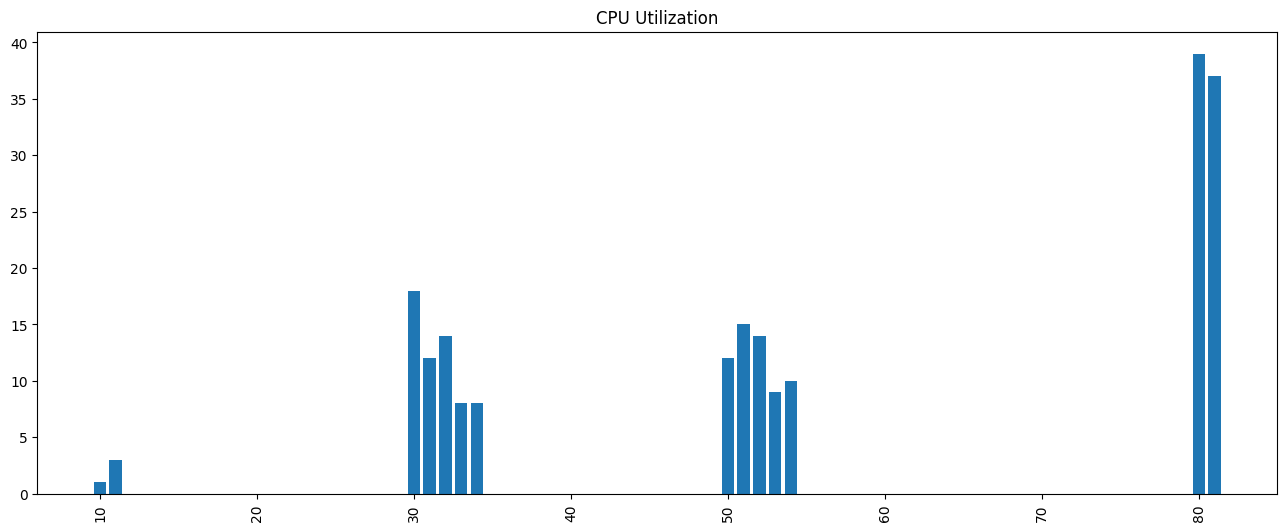

In [45]:
plt.figure(figsize=(16,6))

plot_data = data['cpu_utilization'].value_counts()
x = plot_data.index
y = plot_data.values

plt.bar(x,y)
plt.title('CPU Utilization')
plt.xticks(rotation=90)

plt.show()

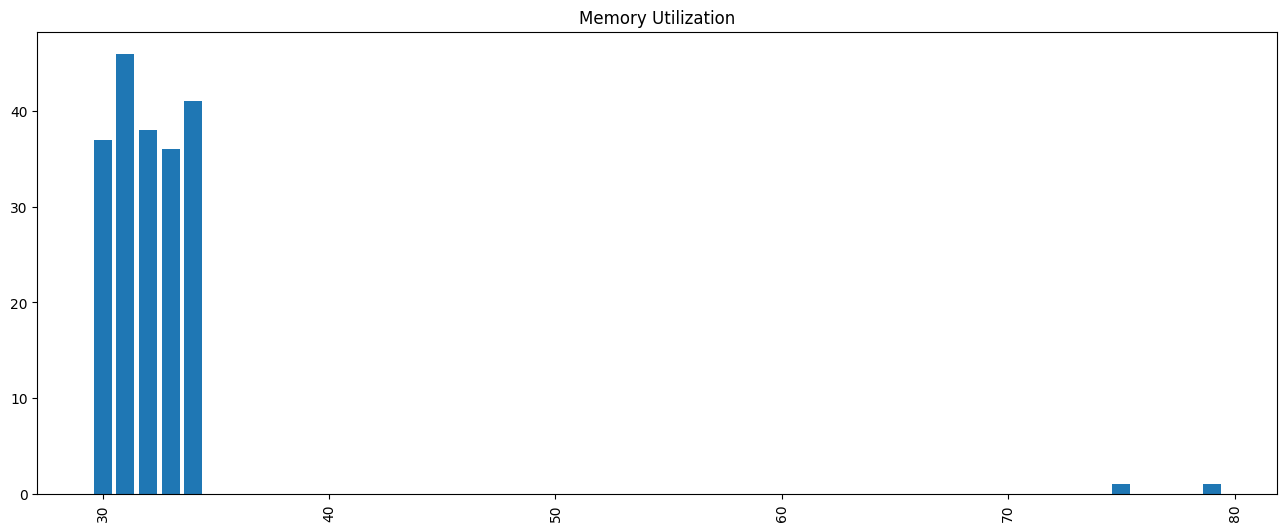

In [46]:
plt.figure(figsize=(16,6))

plot_data = data['mem_utilization'].value_counts()
x = plot_data.index
y = plot_data.values

plt.bar(x,y)
plt.title('Memory Utilization')
plt.xticks(rotation=90)

plt.show()

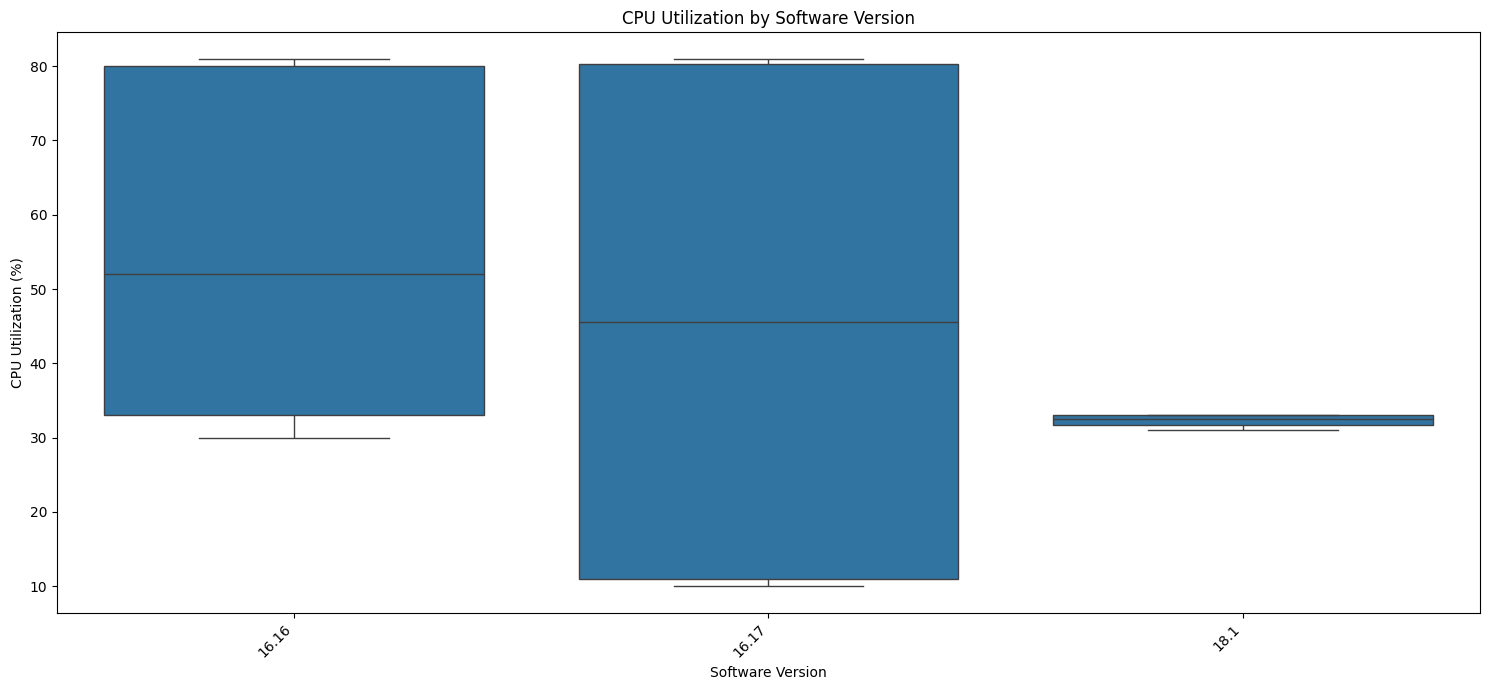

In [47]:
## Analyzing CPU Utilization by Software Version

# Create a box plot to show the distribution of CPU utilization for each software version.
# Box plots are useful for visualizing the distribution, median, and potential outliers
# of a numerical variable across different categories.
plt.figure(figsize=(15, 7))
sns.boxplot(x='version', y='cpu_utilization', data=data)
plt.title('CPU Utilization by Software Version')
plt.xlabel('Software Version')
plt.ylabel('CPU Utilization (%)')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

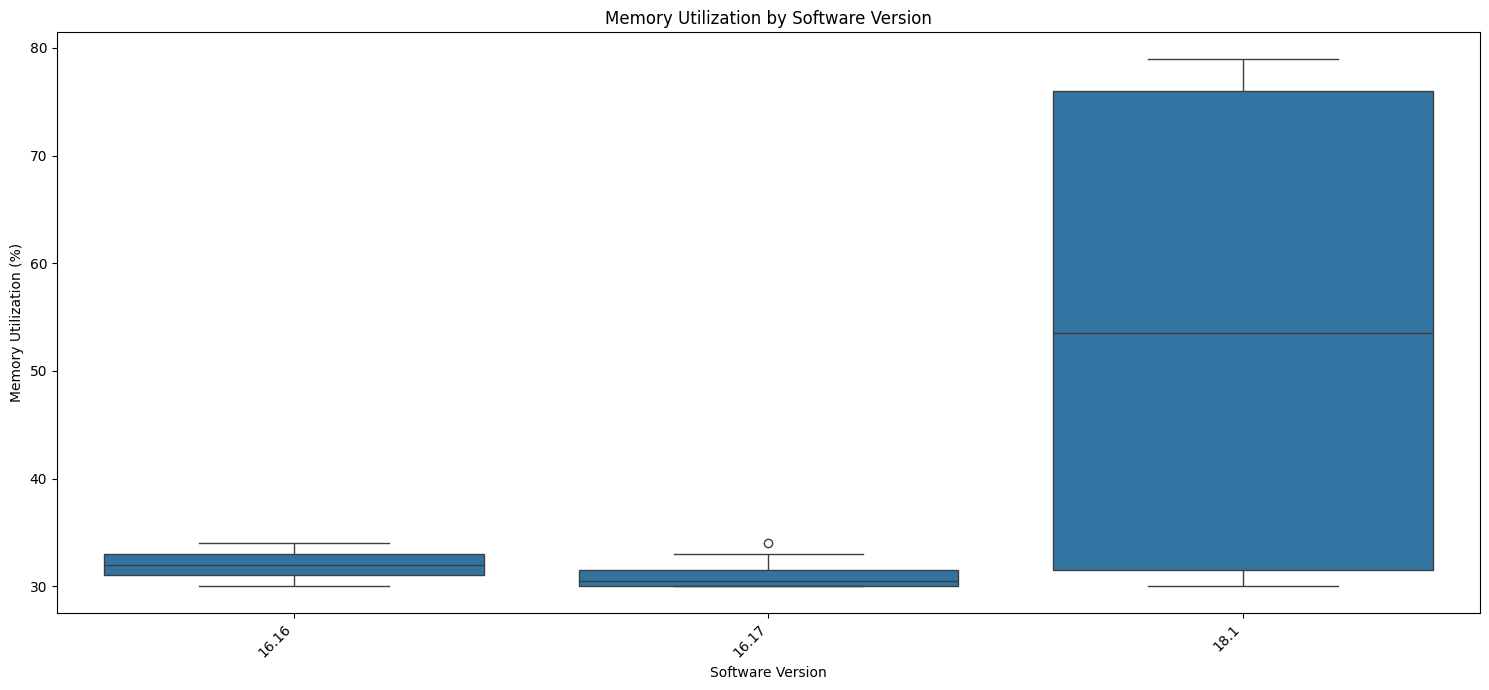

In [48]:
## Analyzing Memory Utilization by Software Version

# Create a box plot to show the distribution of CPU utilization for each software version.
# Box plots are useful for visualizing the distribution, median, and potential outliers
# of a numerical variable across different categories.
plt.figure(figsize=(15, 7))
sns.boxplot(x='version', y='mem_utilization', data=data)
plt.title('Memory Utilization by Software Version')
plt.xlabel('Software Version')
plt.ylabel('Memory Utilization (%)')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

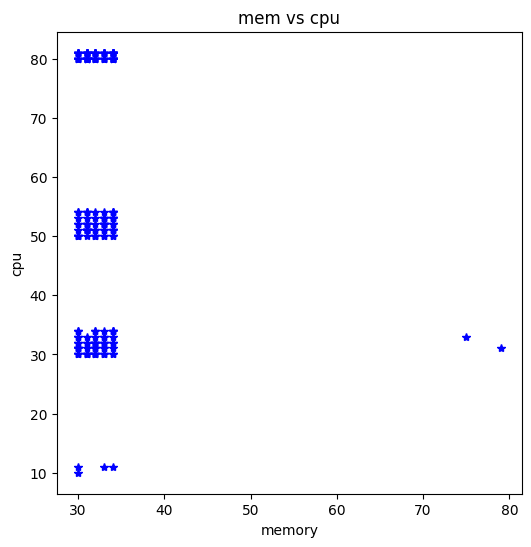

In [49]:
plt.figure(figsize=(6,6))

x = data['mem_utilization']
y = data['cpu_utilization']
forma = '*'

plt.plot(x,y,forma, color='blue')
plt.title('mem vs cpu')
plt.xlabel('memory')
plt.ylabel('cpu')
plt.show()

End of exploratory data analysis